In [1]:
# Objective: Build a machine learning model that predicts house prices based on features like the size of the house,
# number of bedrooms, location, etc.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("Housing1.csv")

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.shape

(545, 13)

In [10]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [11]:
df_columns=[]
for i in df:
    df_columns.append(i.capitalize())

In [12]:
df.columns=df_columns

In [13]:
df.columns

Index(['Price', 'Area', 'Bedrooms', 'Bathrooms', 'Stories', 'Mainroad',
       'Guestroom', 'Basement', 'Hotwaterheating', 'Airconditioning',
       'Parking', 'Prefarea', 'Furnishingstatus'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
cols=["Mainroad","Guestroom","Basement","Hotwaterheating","Airconditioning","Prefarea"]
for f in cols:
    df[f]=le.fit_transform(df[f])

In [15]:
df.head()

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea,Furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [16]:
corr_=df.corr(numeric_only=True)
corr_

,Price,Area,Bedrooms,Bathrooms,Stories,Mainroad,Guestroom,Basement,Hotwaterheating,Airconditioning,Parking,Prefarea
Price,1.000000,0.535997,0.366494,0.517545,0.420712,0.296898,0.255517,0.187057,0.093073,0.452954,0.384394,0.329777
Area,0.535997,1.000000,0.151858,0.193820,0.083996,0.288874,0.140297,0.047417,-0.009229,0.222393,0.352980,0.234779
Bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,-0.012033,0.080549,0.097312,0.046049,0.160603,0.139270,0.079023
Bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.042398,0.126469,0.102106,0.067159,0.186915,0.177496,0.063472
Stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.121706,0.043538,-0.172394,0.018847,0.293602,0.045547,0.044425
Mainroad,0.296898,0.288874,-0.012033,0.042398,0.121706,1.000000,0.092337,0.044002,-0.011781,0.105423,0.204433,0.199876
Guestroom,0.255517,0.140297,0.080549,0.126469,0.043538,0.092337,1.000000,0.372066,-0.010308,0.138179,0.037466,0.160897
Basement,0.187057,0.047417,0.097312,0.102106,-0.172394,0.044002,0.372066,1.000000,0.004385,0.047341,0.051497,0.228083
Hotwaterheating,0.093073,-0.009229,0.046049,0.067159,0.018847,-0.011781,-0.010308,0.004385,1.000000,-0.130023,0.067864,-0.059411
Airconditioning,0.452954,0.222393,0.160603,0.186915,0.293602,0.105423,0.138179,0.047341,-0.130023,1.000000,0.159173,0.117382


<Axes: >

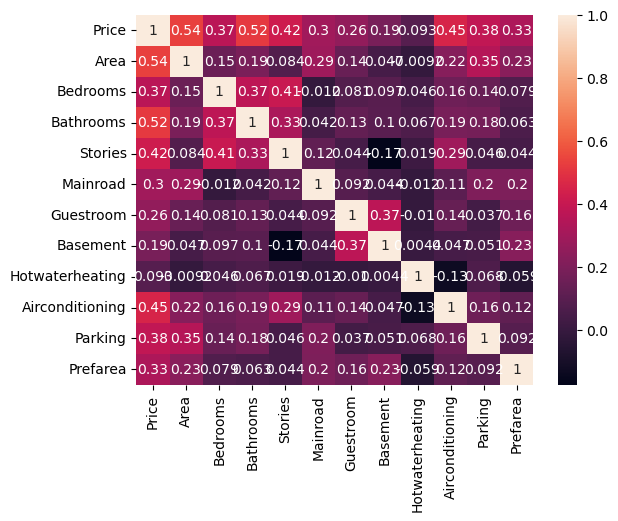

In [17]:
import seaborn as sns
sns.heatmap(corr_,annot=True)

In [18]:
x=df.drop(["Hotwaterheating","Basement","Price","Furnishingstatus"],axis=1)
y=df["Price"]
print(x,y)

     Area  Bedrooms  Bathrooms  Stories  Mainroad  Guestroom  Airconditioning  \
0    7420         4          2        3         1          0                1   
1    8960         4          4        4         1          0                1   
2    9960         3          2        2         1          0                0   
3    7500         4          2        2         1          0                1   
4    7420         4          1        2         1          1                1   
..    ...       ...        ...      ...       ...        ...              ...   
540  3000         2          1        1         1          0                0   
541  2400         3          1        1         0          0                0   
542  3620         2          1        1         1          0                0   
543  2910         3          1        1         0          0                0   
544  3850         3          1        2         1          0                0   

     Parking  Prefarea  
0 

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((436, 9), (109, 9), (436,), (109,))

In [23]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
model=LGBMRegressor(learning_rate=0.09,max_depth=5,random_state=42)
model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000068 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 131
[LightGBM] [Info] Number of data points in the train set: 436, number of used features: 9
[LightGBM] [Info] Start training from score 4706527.385321
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

LGBMRegressor(learning_rate=0.09, max_depth=5, random_state=42)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
y_train_pred=model.predict(x_train)
y_test_pred=model.predict(x_test)

In [39]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

In [40]:
train_mse

704340755730.1226

In [43]:
test_mse

1959991734368.6462

In [44]:
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

In [45]:
train_r2

0.7715695346392478

In [46]:
test_r2

0.612233753051465